In [83]:
import pandas as pd
import sys
from creme import utils
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
result_dir_model = "../../results/necessity_test/enformer/"
tss_tile, cre_tiles = utils.set_tile_range(196608, 5000)
cre_tile_coords = pd.DataFrame(cre_tiles)


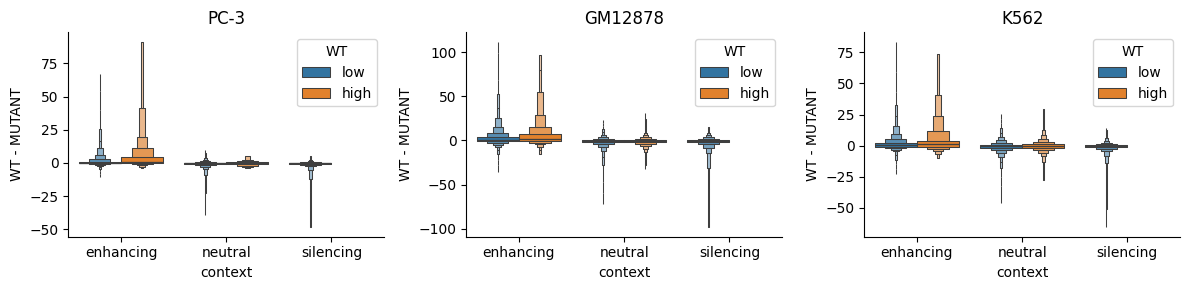

In [92]:
fig, axes = plt.subplots(1, 3, figsize=[12, 3])

for c, cell_line in enumerate(['PC-3', 'GM12878', 'K562']):
    ax = axes[c]
    cell_line_context = pd.read_csv(f'../../results/summary_csvs/enformer/{cell_line}_selected_contexts.csv')
    result_summary = []
    for _, row in cell_line_context.iterrows():
        res_path = f'{result_dir_model}/{row["seq_id"]}.pickle'
        res_raw = utils.read_pickle(res_path)
        res = {k: r[:, :, c].mean(axis=1) for k, r in res_raw.items()}
        # res['mut'] = np.delete(res['mut'], 19)
        one_seq = pd.DataFrame((res['wt'] - res['mut']))
        one_seq.columns = ['WT - MUTANT']
        one_seq['MUTANT'] = res['mut']
        one_seq['WT'] = res['wt'][0]
        one_seq['seq_id'] = row["seq_id"]
        one_seq['tile_start'] = cre_tile_coords[0].values
        one_seq['tile_end'] = cre_tile_coords[1].values
        one_seq['context'] = row['context']
        one_seq['cell_line'] = cell_line
        result_summary.append(one_seq)
    result_summary = pd.concat(result_summary)
    result_summary['WT'] = pd.cut(result_summary['WT'], bins=2, labels = ['low',  'high'])

    sns.boxenplot(data=result_summary, x='context', y='WT - MUTANT', showfliers=False, hue='WT', ax=ax)
    ax.set_title(cell_line)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()

<Axes: xlabel='WT', ylabel='Count'>

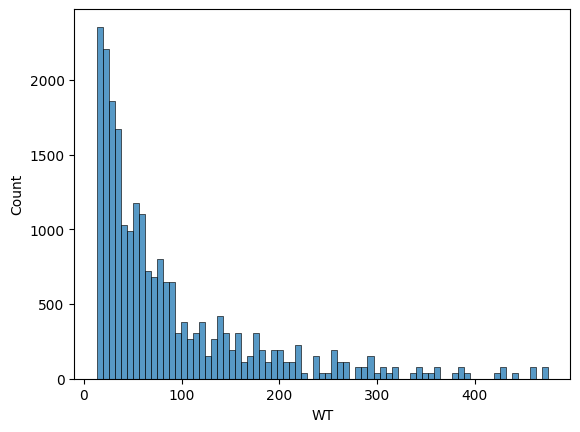

In [37]:
sns.histplot(data=result_summary, x='WT')